<a href="https://colab.research.google.com/github/prithvi-diwanji/NLP2024_exercises/blob/main/prithvi_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download the file research-papers.csv from the link below:
https://mitu.co.in/dataset
This file contains the collection research papers received in different categories.
Perform the following operations on it:
1. Read the file
2. Seperate input (summary) and output data (primary category)
3. Explore the output data
4. Prepare and vectorize the data
5. Cross validate the data
6. Build the KNN model for classification with neighbors = 6
7. Evaluate the performance of algorithm

import libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the file

In [23]:
import csv

In [24]:
df = pd.read_csv('research-papers.csv')

In [25]:
df.shape

(53474, 10)

In [26]:
df.columns

Index(['Unnamed: 0', 'id', 'Title', 'Summary', 'Author', 'Link',
       'Publish Date', 'Update Date', 'Primary Category', 'Category'],
      dtype='object')

Separate input and output data

In [27]:
features = df['Summary']  # input data, use a list to select multiple columns
label = df['Primary Category']  # output data

Explore the output data

In [28]:
features.head()

0    Because of their occasional need to return to ...
1    Market price systems constitute a well-underst...
2    We describe an extensive study of search in GS...
3    As real logic programmers normally use cut (!)...
4    To support the goal of allowing users to recor...
Name: Summary, dtype: object

In [29]:
label

0          cs.AI
1          cs.AI
2          cs.AI
3          cs.AI
4          cs.AI
          ...   
53469    math.ST
53470    math.ST
53471    math.ST
53472    math.ST
53473    math.ST
Name: Primary Category, Length: 53474, dtype: object

In [30]:
set(label)

{'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'math-ph',
 'math.AC',
 'math.AG',
 'math.AP',
 'math.AT',
 'math.CA',
 'math.CO',
 'math.CT',
 'math.CV',
 'math.DG',
 'math.DS',
 'math.FA',
 'math

<Axes: xlabel='Primary Category', ylabel='count'>

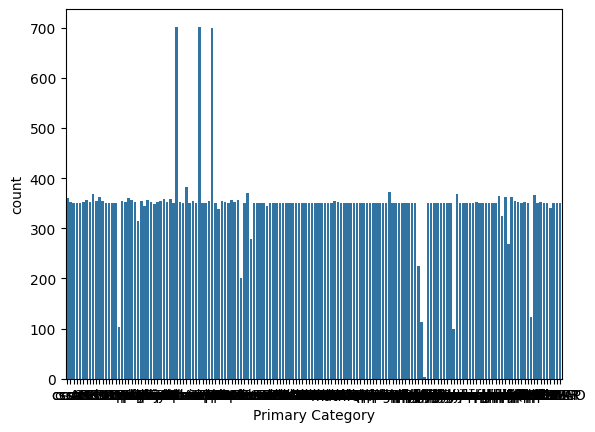

In [31]:
sns.countplot(x = label)

In [32]:
label.value_counts()

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

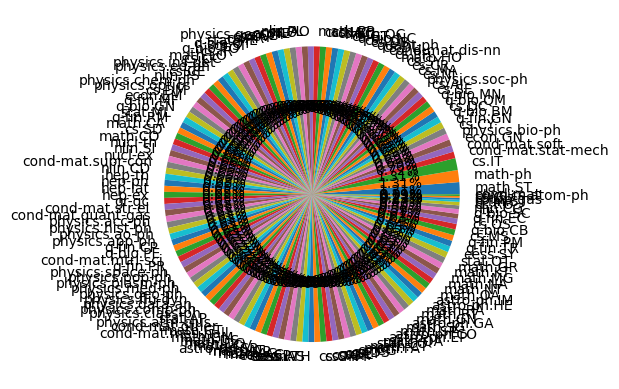

In [33]:
plt.pie(label.value_counts(), labels=label.value_counts().index, autopct='%2.2f%%');

In [34]:
label.value_counts()

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

Prepare and vectorize the data

In [35]:
import re, string

Clean the data

In [36]:
def clean(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', ' ', Text)  # remove hashtags
    Text = re.sub('@\S+', ' ', Text)  # remove mentions
    Text = re.sub('[%s]' % re.escape(string.punctuation),' ',Text)
    # remove punctuations
    Text = re.sub(r'[^\x00-\x7f]',r' ', Text) # remove unicode characters
    Text = re.sub('\s+', ' ', Text)
    # remove extra whitespace
    return Text

In [37]:
clean(df['Summary'][900])

'We obtain a lower bound of n Omega 1 on the k party randomized communication complexity of the Disjointness function in the Number on the Forehead model of multiparty communication when k is a constant For k o loglog n the bounds remain super polylogarithmic i e log n omega 1 The previous best lower bound for three players until recently was Omega log n Our bound separates the communication complexity classes NP CC k and BPP CC k for k o loglog n Furthermore by the results of Beame Pitassi and Segerlind cite BPS07 our bound implies proof size lower bounds for tree like degree k 1 threshold systems and superpolynomial size lower bounds for Lovasz Schrijver proofs Sherstov cite She07b recently developed a novel technique to obtain lower bounds on two party communication using the approximate polynomial degree of boolean functions We obtain our results by extending his technique to the multi party setting using ideas from Chattopadhyay cite Cha07 A similar bound for Disjointness has been

In [38]:
x = df['Summary']
y = df['Primary Category']

TF*IDF Vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer(stop_words='english')

In [41]:
cleaned = x.apply(lambda a: clean(a))

In [42]:
x_vect = tfidf.fit_transform(cleaned)

In [43]:
x_vect.shape

(53474, 85996)

In [44]:
tfidf.get_feature_names_out()

array(['00', '000', '00000000001', ..., 'zynga', 'zynq', 'zz'],
      dtype=object)

In [45]:
from sklearn.model_selection import train_test_split

Cross Validation

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)

In [47]:
x_train.shape

(40105, 85996)

In [48]:
x_test.shape

(13369, 85996)

Build the model

In [49]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# create the object
knn = KNeighborsClassifier()

In [51]:
# train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

Performance Evaluation

In [52]:
y_pred = knn.predict(x_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

